<a href="https://colab.research.google.com/github/Kabindra02/Machine-Learning/blob/main/linear_Regression_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

print("Features: ", diabetes.feature_names)

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [2]:
X = diabetes.data
X.shape #number of samples, number of features

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

print(m, n)

442 10


In [3]:
y= diabetes.target

In [4]:
assert m == y.shape[0]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

assert len(X_train)  == len(y_train)
assert len(X_test)   == len(y_test)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
import numpy as np
intercept = np.ones((X_train.shape[0], 1))

# concatenate the intercept based on axis=1
X_train = np.concatenate((intercept, X_train), axis=1)

# np.ones((shape))
intercept = np.ones((X_test.shape[0], 1))

# concatenate the intercept based on axis=1
X_test = np.concatenate((intercept, X_test), axis=1)

In [8]:
from time import time
assert X_train.shape[0] == y_train.shape[0]
theta = np.zeros(X_train.shape[1])
lr = 0.1

max_iter = 5000

def h_theta(X, theta):
    return X @ theta

def mse(yhat, y):
    return ((yhat - y)**2).sum() / yhat.shape[0]

def gradient(X, error):
    m = X.shape[0]
    return (X.T @ error) / X.shape[0]

start = time()

# define your for loop
for i in range(max_iter):
  yhat = h_theta(X_train, theta)
  error = yhat - y_train
  grad = gradient(X_train, error)
  theta = theta - lr * grad
time_taken = time() - start
theta


array([154.55987055,   0.8813288 , -11.74327298,  21.66310601,
        18.95031351, -28.04105024,  21.1165595 ,  -2.91272396,
        -1.33252463,  34.88607819,   1.86862814])

In [9]:
yhat = h_theta(X_test, theta)

# 2. Calculate mean squared errors
mse = mse(yhat, y_test)

# print the mse
print("MSE: ", mse)
print("Time used: ", time_taken)

MSE:  2733.319552096759
Time used:  0.040873050689697266


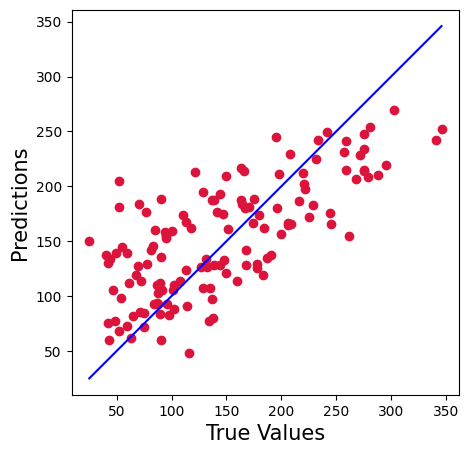

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_test, yhat, c='crimson')

p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()